### If you have any suggestions, or find bugs, create a jira ticket:
https://bbpteam.epfl.ch/project/issues/projects/ACCS/issues/?filter=allopenissues

We begin by loading a circuit

In [1]:
import pandas
import numpy
import bluepy

circ_fn = "/gpfs/bbp.cscs.ch/project/proj83/circuits/Bio_M/20200805/CircuitConfig_TC_WM"
circ = bluepy.Circuit(circ_fn)

New we load basic information about neurons into a DataFrame.
To that end, we first write a "loader_config". It specifies the following:
 - Which neurons to load and which of their properties
 - Which filter to apply. In this example, we focus on layer 4 connectivity only
 - How to group the neurons into different classes. Here, we group the neurons together into 400 um "columns", i.e. according to a hexagonal grid
 
 Feel free to adjust any of the specifics, for example using smaller columns

In [2]:
# install the following repo from: bbpgitlab.epfl.ch:conn/structural/Connectome-utilities.git
# Note: There is more documentation in that repo!
from conntility.circuit_models import neuron_groups

loader_config = {
    "loading": {
        "base_target": "Mosaic", 
        "properties": ["x", "y", "z", "etype", "mtype", "layer", "synapse_class", "ss_flat_x", "ss_flat_y"]
    },
    "filtering":[
        {
            "column": "layer",
            "value": 4
        }
    ],
    "grouping": [
        {
            "method": "group_by_grid",
            "columns": ["ss_flat_x", "ss_flat_y"],
            "args": [400.0],
            "kwargs":{
                "prefix": "hex400-"                
            }
        }
    ]
}


base_grp = neuron_groups.load_group_filter(circ, loader_config)
base_grp = base_grp.loc[base_grp["hex400-x"] > -1E6]

display(base_grp)

/gpfs/bbp.cscs.ch/home/reimann/venvs/py38/lib/python3.8/site-packages/conntility/flatmapping/_supersample_utility.py:136: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  res = Rotation.align_vectors(vtgt, vv)


Rotation errors: min: 0.0, median: 0.09387602600937471, mean: 0.136282418448154, std: 0.15664142313801505, max: 2.0


,,etype,layer,mtype,synapse_class,x,y,z,gid,ss_flat_x,ss_flat_y,hex400-x,hex400-y,hex400-subtarget
hex400-i,hex400-j,,,,,,,,,,,,,
-3,6,cNAC,4,L4_BP,INH,3935.875808,-2120.645544,-2156.657847,2206292,723.002011,1920.459284,1.039230e+03,1800.0,R3;C1
4,7,cACint,4,L4_BP,INH,5429.642871,-1262.427607,-4874.859457,2206293,4087.381313,705.720657,3.810512e+03,600.0,R1;C5
-15,15,bNAC,4,L4_BP,INH,1964.702652,1091.962301,-1301.027629,2206294,183.262735,5823.590582,3.673940e-13,6000.0,R10;C0
-13,17,cNAC,4,L4_BP,INH,2625.043789,2167.404245,-1035.677347,2206295,1467.736632,6209.748800,1.385641e+03,6000.0,R10;C2
6,6,cNAC,4,L4_BP,INH,5243.143890,-1681.832926,-5378.442266,2206296,4109.221373,191.553310,4.156922e+03,0.0,R0;C6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,10,cSTUT,4,L4_LBC,INH,5454.385788,-859.306284,-4217.743437,2885708,3813.424272,1406.395811,3.810512e+03,1800.0,R3;C5
3,6,dNAC,4,L4_LBC,INH,4803.351240,-2302.172723,-4608.297791,2885709,2882.768952,405.078887,3.117691e+03,600.0,R1;C4
-4,8,dNAC,4,L4_LBC,INH,3967.728001,-1128.846627,-2056.902446,2885710,1319.944360,2724.312314,1.385641e+03,2400.0,R4;C2


Quick check: How many neurons of each type are we considering?

As expected: Only layer 4 neurons, but all of them.

In [3]:
base_grp["mtype"].value_counts()

L4_TPC       384186
L4_UPC       159798
L4_SSC        54468
L4_LBC        12192
L4_MC          9209
L4_NBC         8262
L4_BTC         4895
L4_BP          1743
L4_SBC         1658
L4_DBC         1641
L4_NGC         1006
L4_CHC          364
L5_TPC:B          0
L5_SBC            0
L5_NGC            0
L5_NBC            0
L5_TPC:A          0
L5_TPC:C          0
L5_LBC            0
L6_LBC            0
L6_TPC:C          0
L6_TPC:A          0
L6_SBC            0
L6_NGC            0
L6_NBC            0
L6_MC             0
L6_IPC            0
L5_UPC            0
L6_HPC            0
L6_DBC            0
L6_CHC            0
L6_BTC            0
L6_BPC            0
L6_BP             0
L5_MC             0
L1_DAC            0
L5_DBC            0
L5_CHC            0
L1_LAC            0
L1_NGC-DA         0
L1_NGC-SA         0
L1_SAC            0
L23_BP            0
L23_BTC           0
L23_CHC           0
L23_DBC           0
L23_LBC           0
L23_MC            0
L23_NBC           0
L23_NGC           0


We use the following to load the matrix of connections _between_ the defined groups.
(Note: There are different functions available for loading connections within groups).

Here, we load the midrange connection count. Use instead "local" for location connectivity.

In [ ]:
from conntility import circuit_models

M = circuit_models.circuit_matrix_between_groups(circ, base_grp, connectome="intra_SSCX_midrange_wm",
                                                 extract_full=True)

The result is a pandas.Series with connection counts between groups. Indexed by the name of the source / target groups.

Note that for this purpose the names of the source / target groups are slightly altered. In "base_grp" above the groups are given by a "i" and a "j" index. The i and j are condensed into a single string, separated by an underscore.

In [7]:
display(M)

Source node  Target node
-10_11       -10_14           3372.0
             -10_17         255834.0
             -10_20             16.0
             -11_13              4.0
             -11_16          91396.0
                              ...   
6_6          -8_13               2.0
             -8_16            1103.0
             -9_15           11686.0
             -9_18            2837.0
             0_6                 1.0
Length: 2618, dtype: float64

Let plot the connectivity matrix

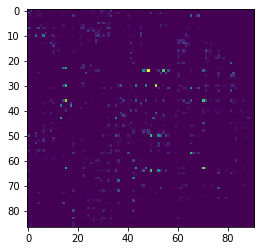

In [10]:
from matplotlib import pyplot as plt

plt.imshow(M.unstack("Target node", fill_value=0), interpolation="nearest")

For further analysis, we need to know the locations of each of the groups. So we quickly assembly a frame of the flat x and y locations of each group, index by the same strings as "M".

In [11]:
hex_locations = base_grp.groupby(base_grp.index.names)[["hex400-x", "hex400-y"]].agg("mean")
idxx = hex_locations.index.to_frame().apply(lambda row: "{0}_{1}".format(*row.values), axis=1)
hex_locations.index = idxx

display(hex_locations)

,hex400-x,hex400-y
-16_17,3.464102e+02,6600.0
-15_15,3.673940e-13,6000.0
-15_18,1.039230e+03,6600.0
-14_13,-3.464102e+02,5400.0
-14_16,6.928203e+02,6000.0
...,...,...
4_10,4.849742e+03,1200.0
5_5,3.464102e+03,0.0
5_8,4.503332e+03,600.0
6_6,4.156922e+03,0.0


Unstacking and re-stacking the data leads to filling in "0" values for all combinations that are unlisted 

In [35]:
M = M.unstack("Target node", fill_value=0).stack()

Now we can plot for example the strengths of connections from an exemplary location
NOTE: This is long-range connectivity only, so we do not expect it to peak around the source location

<ipython-input-69-bf6454f1a6d7>:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for loc, value in m.iteritems():


Text(0, 0.5, 'um')

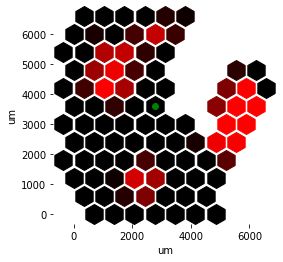

In [69]:
exemplary_ij = "-5_13"
exemplary_loc = hex_locations.loc[exemplary_ij]
plot_divider = 5

# Submatrix
m = M.loc[exemplary_ij]
m.name = "C"
# Concatenate the connectivity data with the x, y corresponding locations of target groups.
# Than set the index to the locations
m = pandas.concat([m, hex_locations.loc[m.index]], axis=1).set_index(["hex400-x", "hex400-y"], drop=True)["C"]

# Plot log-scale
ax = plt.figure(figsize=(4, 4)).gca()
for loc, value in m.iteritems():
    col = [numpy.minimum(numpy.log10(value + 1) / plot_divider, 1), 0, 0]
    ax.plot(loc[0], loc[1], marker="h", color=col, ms=20)

ax.plot(exemplary_loc["hex400-x"], exemplary_loc["hex400-y"], marker='o', color="green")
ax.set_frame_on(False)
ax.set_xlabel("um"); ax.set_ylabel("um")

Neat! Even cooler: Both outgoing and incoming connectivity.
We encode outgoing strength in the "red" channel, incoming in the "blue" channel.

Text(0, 0.5, 'um')

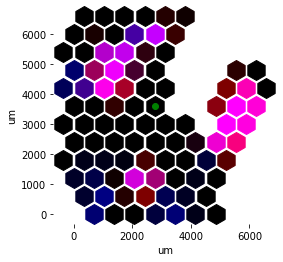

In [79]:
M.loc[:, exemplary_ij]

exemplary_ij = "-5_13"
exemplary_loc = hex_locations.loc[exemplary_ij]
plot_divider = 5

# Submatrices
m_outgoing = M.loc[exemplary_ij]
m_outgoing.name = "OUT"

m_incoming = M.loc[:, exemplary_ij]
m_incoming.name = "IN"

# Concatenate the connectivity data with the x, y corresponding locations of target groups.
# Than set the index to the locations
m = pandas.concat([m_outgoing, m_incoming], axis=1)               
m = pandas.concat([m, hex_locations.loc[m.index]], axis=1).set_index(["hex400-x", "hex400-y"], drop=True)

# Plot log-scale
ax = plt.figure(figsize=(4, 4)).gca()
for loc, values in m.iterrows():
    col = [numpy.minimum(numpy.log10(values["OUT"] + 1) / plot_divider, 1),
           0,
           numpy.minimum(numpy.log10(values["IN"] + 1) / plot_divider, 1)]
    ax.plot(loc[0], loc[1], marker="h", color=col, ms=20)

ax.plot(exemplary_loc["hex400-x"], exemplary_loc["hex400-y"], marker='o', color="green")
ax.set_frame_on(False)
ax.set_xlabel("um"); ax.set_ylabel("um")

Another example: Total incoming strength.

Note: Not using logarithmic color scale, unlike above

<ipython-input-60-2482922af0d6>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for loc, value in m.iteritems():


Text(0, 0.5, 'um')

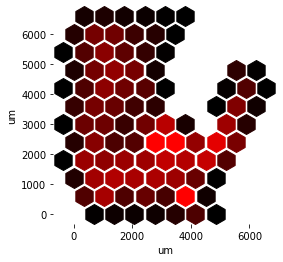

In [60]:
plot_divider = 5E6
# Matrix of sum of incoming connections
m = M.groupby("Target node").agg("sum")
m.name = "C"

# Concatenate the connectivity data with the x, y corresponding locations of target groups.
# Than set the index to the locations
m = pandas.concat([m, hex_locations.loc[m.index]], axis=1).set_index(["hex400-x", "hex400-y"], drop=True)["C"]

# Plot log-scale
ax = plt.figure(figsize=(4, 4)).gca()
for loc, value in m.iteritems():
    col = [numpy.minimum(value / plot_divider, 1), 0, 0]
    ax.plot(loc[0], loc[1], marker="h", color=col, ms=20)

ax.set_frame_on(False)
ax.set_xlabel("um"); ax.set_ylabel("um")

Or outgoing

<ipython-input-61-f7faebf577ac>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for loc, value in m.iteritems():


Text(0, 0.5, 'um')

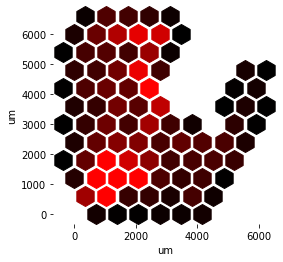

In [61]:
plot_divider = 5E6
# Matrix of sum of outgoing connections
m = M.groupby("Source node").agg("sum")
m.name = "C"

# Concatenate the connectivity data with the x, y corresponding locations of target groups.
# Than set the index to the locations
m = pandas.concat([m, hex_locations.loc[m.index]], axis=1).set_index(["hex400-x", "hex400-y"], drop=True)["C"]

# Plot log-scale
ax = plt.figure(figsize=(4, 4)).gca()
for loc, value in m.iteritems():
    col = [numpy.minimum(value / plot_divider, 1.0), 0, 0]
    ax.plot(loc[0], loc[1], marker="h", color=col, ms=20)

ax.set_frame_on(False)
ax.set_xlabel("um"); ax.set_ylabel("um")